# Project: Exploration of FIFA World Cup Data

## Table of Contents

- [Introduction](#intro)
- [Downloading the Datasets](#download)
- [Preliminary Wrangling](#wrangle)
- [Project Motivation](#motivation)
- [Univariate Exploration](#univariate)
- [Bivariate Exploration](#bivariate)
- [Multivariate Exploration](#multivariate)
- [Conclusion](#conclusion)

<a id='intro'></a>

## 1. Introduction

> The FIFA World Cup, often simply called the World Cup, is an international association football competition contested by the senior men's national teams of the members of the Fédération Internationale de Football Association (FIFA), the sport's global governing body. The championship has been awarded every four years since the inaugural tournament in 1930, except in 1942 and 1946 when it was not held because of the Second World War. The current champion is France, which won its second title at the 2018 tournament in Russia. [(Wikipedia)](https://en.wikipedia.org/wiki/FIFA_World_Cup)
> 
> The data. This project features three datasets downloaded from Kaggle [(Data Source)](https://www.kaggle.com/datasets/abecklas/fifa-world-cup?select=WorldCups.csv). The first dataset contains basic match information such as home team name, stadium, city, referee name and so on. The second dataset contains player information such as player name, shirt number, position etc. The last dataset contains information about the tournament such as the winners, runner-ups, qualified team, goals scored etc. 
>
> The objective of this project is to demonstrate the understanding of two data analysis processes: **'Exploratory Data Analysis'**  and **'Explanatory Data Analysis'**.

In [1]:
# import all necessary packages 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import opendatasets as od;

<a id='download'></a>

##  2. Downloading the Datasets
The datasets can be easily downloaded using the opendatasets library. 

In [2]:
# download datasets programmatically  
url = "https://www.kaggle.com/datasets/abecklas/fifa-world-cup/download"
od.download(url, force=False)

  0%|                                                                                       | 0.00/349k [00:00<?, ?B/s]

100%|████████████████████████████████████████████████████████████████████████████████| 349k/349k [00:00<00:00, 582kB/s]


<a id='wrangle'></a>

## 3. Preliminary Wrangling
**Note:   
Semicolons are added to suppress large output of some cells   
Remove semicolon to show output**

### 3.1 Gather

In [3]:
# load the three datasets into the pandas dataframe
matches_df = pd.read_csv('./fifa-world-cup/WorldCupMatches.csv')
players_df = pd.read_csv('./fifa-world-cup/WorldCupPlayers.csv')
world_df = pd.read_csv('./fifa-world-cup/WorldCups.csv')

### 3.2 Assess
Here, I accessed the quality and tidiness of the datasets by checking for erroneous datatypes, duplicates, missing value and so on. Also, this would get me acquainted with the structure of the data. 

#### ***matches_df***

In [4]:
matches_df.head();

In [5]:
matches_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  852 non-null    float64
 1   Datetime              852 non-null    object 
 2   Stage                 852 non-null    object 
 3   Stadium               852 non-null    object 
 4   City                  852 non-null    object 
 5   Home Team Name        852 non-null    object 
 6   Home Team Goals       852 non-null    float64
 7   Away Team Goals       852 non-null    float64
 8   Away Team Name        852 non-null    object 
 9   Win conditions        852 non-null    object 
 10  Attendance            850 non-null    float64
 11  Half-time Home Goals  852 non-null    float64
 12  Half-time Away Goals  852 non-null    float64
 13  Referee               852 non-null    object 
 14  Assistant 1           852 non-null    object 
 15  Assistant 2          

In [6]:
sum(matches_df.duplicated())

3735

In [7]:
matches_df[matches_df['Year'].isnull()];

In [8]:
matches_df.iloc[[850, 851]];

**It seems the data entry stopped at row 851. Hence, all subsequent rows are irrelevant.**

In [9]:
matches_df.Stage.unique();

In [10]:
matches_df['Home Team Name'].unique();

In [11]:
matches_df['Away Team Name'].unique();

#### ***players_df***

In [12]:
players_df.head();

In [13]:
players_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37784 entries, 0 to 37783
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   RoundID        37784 non-null  int64 
 1   MatchID        37784 non-null  int64 
 2   Team Initials  37784 non-null  object
 3   Coach Name     37784 non-null  object
 4   Line-up        37784 non-null  object
 5   Shirt Number   37784 non-null  int64 
 6   Player Name    37784 non-null  object
 7   Position       4143 non-null   object
 8   Event          9069 non-null   object
dtypes: int64(3), object(6)
memory usage: 2.6+ MB


In [14]:
sum(players_df.duplicated())

736

#### ***world_df***

In [15]:
world_df.head();

In [16]:
world_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Year            20 non-null     int64 
 1   Country         20 non-null     object
 2   Winner          20 non-null     object
 3   Runners-Up      20 non-null     object
 4   Third           20 non-null     object
 5   Fourth          20 non-null     object
 6   GoalsScored     20 non-null     int64 
 7   QualifiedTeams  20 non-null     int64 
 8   MatchesPlayed   20 non-null     int64 
 9   Attendance      20 non-null     object
dtypes: int64(4), object(6)
memory usage: 1.7+ KB


In [17]:
world_df['Country'].unique();

In [18]:
world_df['Winner'].unique();

In [19]:
world_df['Runners-Up'].unique();

In [20]:
world_df['Third'].unique();

In [21]:
world_df['Fourth'].unique();

Upon assessing our data programmatically and visually, the following issues are addressed in the subsequent code cells.

**```matches_df``` table**
- rows with NaN
- some rows are duplicated
- some column datatype should be 'int' not 'float'
- Inconsistent values in 'Stage' column
- Erroneous country name

**```players_df``` table**
- duplicated rows 

**```world_df``` table**
- 'attendance' datatype 

<a id='motivate'></a>

### 3.2 Clean

In [22]:
matches_clean_df = matches_df.copy()
world_clean_df = world_df.copy()

#### matches_df table

##### rows with missing value

In [23]:
# drop rows with NaN
matches_clean_df.dropna(inplace=True)

##### duplicated data

In [24]:
# drop duplicates
matches_clean_df.drop_duplicates(inplace=True)

##### erroneous datatype

In [25]:
# change float datatypes to int
for column in matches_clean_df.columns:
    if matches_clean_df[column].dtype == float:
        matches_clean_df[column] = matches_clean_df[column].astype(int)

In [26]:
# change 'Datetime' datatype 
matches_clean_df.Datetime = pd.to_datetime(matches_clean_df.Datetime)

In [27]:
# extract month from 'Datatime' column
months = {0: 'Jan', 2:'Feb', 3:'Mar', 4:'April', 5:'May', 6:'Jun', 
           7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}
matches_clean_df['Month'] = matches_clean_df['Datetime'].dt.month.map(months)

##### Replace and add new columns
There are inconsistent values in 'Stage' column. For example, 'Group 1', 'Group 2', ... correspond to 'Group A', 'Group B', ... respectively. Also, 'Play-off for third place' and 'Match for third place' mean the same thing.

In [28]:
# replace inconsistent values
old_groups = ['Group 1', 'Group 2', 'Group 3', 'Group 4', 'Group 5', 'Group 6']
new_groups = ['Group A', 'Group B', 'Group C', 'Group D', 'Group E', 'Group F'] 
old_place = ['Match for third place', 'Play-off for third place']
new_place = 'Third place'
matches_clean_df['Stage'].replace(old_groups, new_groups, inplace=True)
matches_clean_df['Stage'].replace(old_place, new_place, inplace=True)

Part of this notebook requires analysis based on continents. To archive this, I added add new columns which contains the corresponding continent of each country. The data used is gotten from a Github repository. Also, this file is available in this project repository.

In [29]:
continents = pd.read_csv('https://raw.githubusercontent.com/dbouquin/IS_608/master/NanosatDB_munging/Countries-Continents.csv')

In [30]:
continents.head(3)

,Continent,Country
0,Africa,Algeria
1,Africa,Angola
2,Africa,Benin


**Note: Country names that start with 'rn' denote the current country name at the time of the tournament**

In [31]:
old_name = ['rn">United Arab Emirates', 'rn">Republic of Ireland', 
            'rn">Trinidad and Tobago', 'rn">Serbia and Montenegro',
            "C�te d'Ivoire", 'rn">Bosnia and Herzegovina',
           ]

new_name = ['United Arab Emirates', 'Republic of Ireland', 
            'Trinidad and Tobago', 'Serbia and Montenegro',
            "Cote d'Ivoire", 'Bosnia and Herzegovina',
           ]
    
matches_clean_df[['Home Team Name', 'Away Team Name']] = (
    matches_clean_df[['Home Team Name', 'Away Team Name']].replace(old_name, new_name)
)

Before I merge both dataframes however, I first checked for countries with missing continents in the 'continent file'. These countries, if any exist, are added manually.

In [32]:
home_countries = matches_clean_df['Home Team Name']
away_countries = matches_clean_df['Away Team Name']

missing_home = home_countries[~home_countries.isin(continents.Country)].unique()
missing_away = away_countries[~away_countries.isin(continents.Country)].unique()

missing_home;
missing_away;

additional_continents = {'England': 'Europe', 'Wales': 'Europe', 'Scotland': 'Europe', 
                         'Republic of Ireland': 'Europe', 'Northern Ireland': 'Europe',
                         'USA': 'North America', 'Congo DR': 'Africa', 
                         "Cote d'Ivoire": 'Africa', 'Korea DPR': 'Asia',
                         'Dutch East Indies': 'Asia', 'Korea Republic': 'Asia',
                         'Germany FR': 'Europe', 'Soviet Union': 'Asia', 
                         'German DR': 'Europe', 'Zaire': 'Africa', 'Russia': 'Asia', 
                         'China PR': 'Asia', 'Czech Republic': 'Europe',
                         'Serbia and Montenegro': 'Europe', 'IR Iran': 'Asia',
                         'Yugoslavia': 'Europe', 'Czechoslovakia': 'Europe'
                        }

# convert additional_contents to dataframe
additional_continents_df = pd.DataFrame(additional_continents.items(), columns=['Country', 'Continent'])
additional_continents_df

# append 'additional_continents_df' to 'continents'
continent = continents.append(additional_continents_df)
continent

# create two new columns corresponding to the continents of Home and Away countries
matches_clean_df = pd.merge(continent, matches_clean_df, right_on='Home Team Name', left_on='Country')
matches_clean_df = pd.merge(continent, matches_clean_df, right_on='Away Team Name', left_on='Country')
matches_clean_df

# rename and drop columns
matches_clean_df.rename(columns={'Continent_x': 'Away Team Continent', 'Continent_y': 'Home Team Continent'}, inplace=True) 
matches_clean_df.drop(columns= ['Country_x', 'Country_y'], inplace=True)
matches_clean_df;

#### players_df table

In [33]:
# drop duplicates
players_df.drop_duplicates(inplace=True)

#### world_df table

Extract valid attendance for each finals from 'matches_clean_df' table  
**Note: The data for 1950 world cup final was hard coded because it is missing.**

In [34]:
valid_attendance = list(matches_clean_df.query('Stage == "Final"').sort_values(by="Year").Attendance.values)
valid_attendance.insert(3, 173850)

In [35]:
len(valid_attendance)

20

In [36]:
world_clean_df['Attendance'] = valid_attendance
world_clean_df;

In [37]:
# rename 'Country' column in 'world_clean_df' table before merging to avoid overlapping
world_clean_df.rename(columns={'Country': 'Host Country'}, inplace=True)

In [38]:
columns = ['Winner', 'Runners-Up', 'Third', 'Fourth']

for column in columns:
    world_clean_df= pd.merge(continent, world_clean_df, right_on=column, left_on='Country')
    world_clean_df.drop('Country', axis=1, inplace=True)
    new_name = column + ' Continent'
    world_clean_df.rename(columns={'Continent': new_name}, inplace=True)

world_clean_df;

<a id='motivation'></a>

## 4. Project Motivation
The motivation behind this project is to answer some interesting questions about the datasets. Also, few units of energy is expended to determine what factors are associated with countries that have won the World Cup over the years. 

<font color='red'>**Note: Data for 1950 and 2018 world cup are missing from 'matches_clean_df' table. Gathering the dataset would require significant amount of time. However, though not an excuse, since this project is primarily focused on data visualization, this data is not gathered. In this vein, all questions answered is not and should not be considered 'accurate' as they might be off by few units.**</font>

<a id='univariate'></a>

## 5. Univariate Exploration

### Q1: How many countries have participated in the FIFA World Cup? 

In [39]:
top_participants = (matches_clean_df
                   .groupby(['Year', 'Away Team Name'], as_index=False)
                   .count()['Away Team Name']
                   .value_counts()
                   .head()
                  )

83


Argentina    16
Brazil       15
Mexico       15
Italy        14
France       14
Name: Away Team Name, dtype: int64

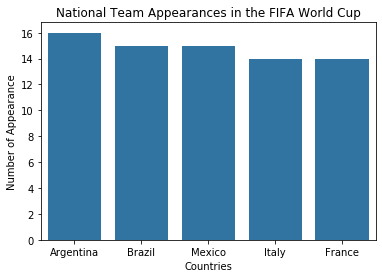

In [40]:
base_color = sns.color_palette()[0]
print(len(matches_clean_df['Away Team Name'].unique()))
display(top_participants)
sns.barplot(top_participants.index, top_participants, color=base_color)
plt.xlabel('Countries')
plt.ylabel('Number of Appearance')
plt.title('National Team Appearances in the FIFA World Cup');

A total of 83 countries have participated in the FIFA World Cup with Argentina having the highest number of appearance, 16. 

### Q2: How many countries from each continent have participated in the FIFA World Cup? 

In [41]:
top_participants_continent = (matches_clean_df
                   .groupby(['Year', 'Away Team Name', 'Away Team Continent'], as_index=False)
                   .count()['Away Team Continent']
                   .value_counts()
                   .head()
                  )

Europe           210
South America     73
Asia              44
Africa            39
North America     39
Name: Away Team Continent, dtype: int64

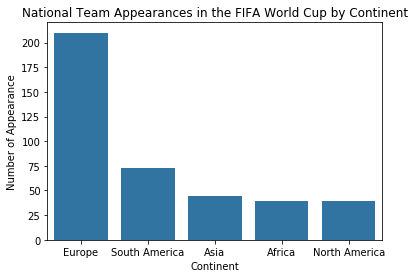

In [42]:
display(top_participants_continent)
sns.barplot(top_participants_continent.index, top_participants_continent, color=base_color)
plt.xlabel('Continent')
plt.ylabel('Number of Appearance')
plt.title('National Team Appearances in the FIFA World Cup by Continent');

Countries from Europe have the highest number of appearances in the FIFA World Cup. 'Appearance' here does not denote number of matches played but rather participation per year.

### Q3: How does the attendance vary over the past tournaments? 

In [59]:
def sum_attendance(data, var_name):
    """Sum up all attendance by year.
    input: dataframe
    outputs: table showing top 5 and visualization"""
    
    data = data.groupby(['Year'], as_index=True).sum()['Attendance']
    display(data.head())
    data.plot()
    plt.title(f'Distribution of {var_name} Per Year');

Year
1930     590549.0
1934     363000.0
1938     375700.0
1950    1045246.0
1954     768607.0
Name: Attendance, dtype: float64

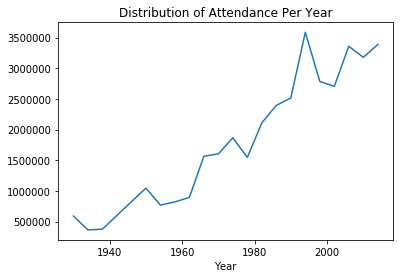

In [60]:
sum_attendance(matches_clean_df, 'Attendance')

A higher number of people watched the first world cup compared to the next two subsequent tournaments. Also, there is a significant drop around 1998 and 2002.

### Q4: Which country has hosted the World Cup the most?

Brazil     2
Germany    2
Italy      2
Name: Host Country, dtype: int64

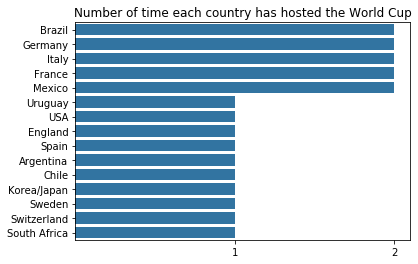

In [45]:
host = world_clean_df['Host Country'].value_counts()
display(host.head(3))
sns.barplot(host, host.index, color=base_color)
plt.xticks([1, 2])
plt.xlabel('')
plt.title('Number of time each country has hosted the World Cup');

Each of France, Brazil, Germany, Mexico and Italy have hosted the World Cup twice while Korea and Japan both jointly hosted the tournament once. The rest of the countries hosted once

### Q5: What is the frequency of match played per month?

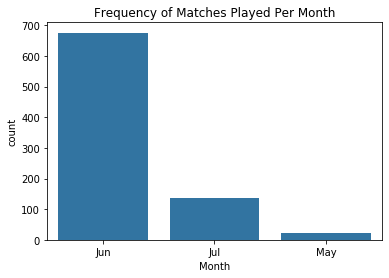

In [46]:
sns.countplot(data=matches_clean_df, x='Month', color=base_color)
plt.title('Frequency of Matches Played Per Month');

Majority of World Cup matches is played in the month of June

### Q6: Which player has the highest number of match played?

In [47]:
sum(players_df.duplicated(['MatchID', 'Player Name']))

27

Player Name
RONALDO    33
KLOSE      28
CAFU       26
LEAO       25
DIDA       25
Name: RoundID, dtype: int64

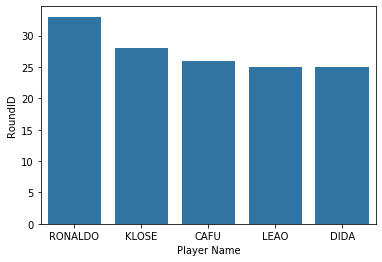

In [48]:
player_match = (players_df
                .groupby(['Player Name'])
                .count()['RoundID']
                .sort_values(ascending=False)
                .head()
               )
display(player_match)
sns.barplot(player_match.index, player_match, color=base_color);

RONALDO has the highest number of World Cup matches played having played a total of 33 matches

### Q7: Which coach holds the record for most games managed?

In [49]:
# drop duplicated matches
df = players_df.drop_duplicates(['MatchID', 'Team Initials'])

SCHOEN Helmut (FRG)              25
PARREIRA Carlos Alberto (BRA)    23
SCOLARI Luiz Felipe (BRA)        21
ZAGALLO Mario (BRA)              20
MILUTINOVIC Bora (YUG)           20
Name: Coach Name, dtype: int64

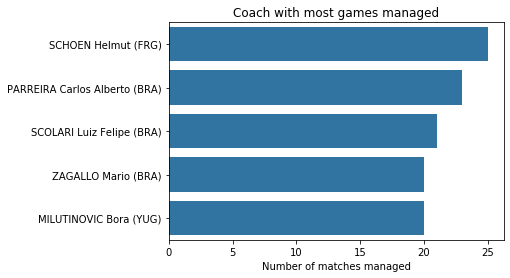

In [50]:
coach = df['Coach Name'].value_counts().head(5)
display(coach) 
sns.barplot(coach, coach.index, color=base_color);
plt.xlabel('Number of matches managed')
plt.title('Coach with most games managed');

SCHOEN Helmut, West Germany Coach, holds the record for most World Cup games managed

<a id='bivariate'></a>

## 6. Bivariate Exploration

### Q7: In which month is the World Cup Final played most?

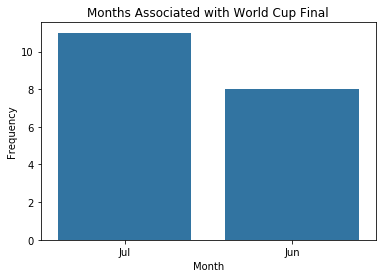

In [51]:
final_matches = matches_clean_df.loc[matches_clean_df['Stage'] == 'Final']
sns.countplot(data=final_matches, x='Month', color=base_color)
plt.ylabel('Frequency')
plt.title('Months Associated with World Cup Final');

While majority of World Cup matches are played in June, majority of finals are played in the month of July.

### Q8: What effect does a home country's continent have on the attendance of spectators?

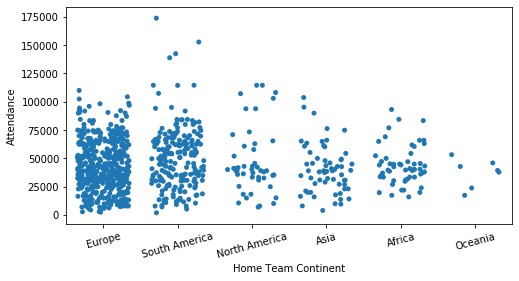

In [52]:
plt.figure(figsize=(8, 4))
sns.stripplot(data=matches_clean_df, x='Home Team Continent', y='Attendance', color=base_color, jitter=0.35)
plt.xticks(rotation=15);

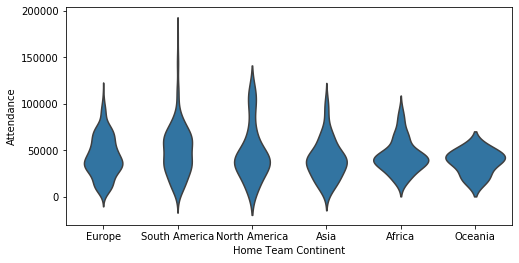

In [53]:
plt.figure(figsize=(8, 4))
sns.violinplot(data=matches_clean_df, x='Home Team Continent', y='Attendance', color=base_color, inner=None)
plt.xticks(rotation=15);

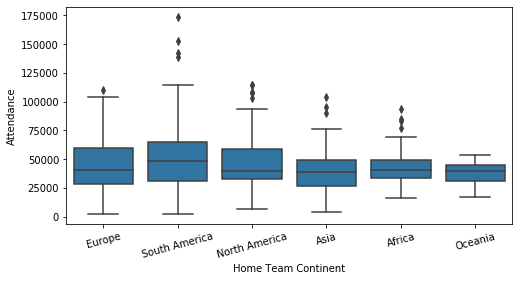

In [54]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=matches_clean_df, x='Home Team Continent', y='Attendance', color=base_color)
plt.xticks(rotation=15);

Countries in South America seem to have better spectator turn out 

<a id='multivariate'></a>

## 7. Multivariate Exploration

### Q9: What is the highest goal scored in a single match by a home team?

,Home Team Name,Home Team Goals,Home Team Continent
431,Hungary,10,Europe
778,Yugoslavia,9,Europe
733,Hungary,9,Europe


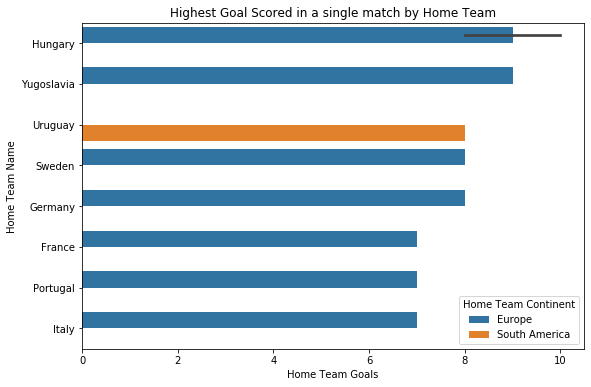

In [55]:
home_team_goals = (matches_clean_df
                   .sort_values(by='Home Team Goals', ascending=False)
                   [['Home Team Name', 'Home Team Goals', 'Home Team Continent']].head(10)
                  )
display(home_team_goals.head(3))
plt.figure(figsize=(9,6))
sns.barplot(data=home_team_goals, y='Home Team Name', x='Home Team Goals', hue='Home Team Continent')
plt.title('Highest Goal Scored in a single match by Home Team');

Hungary has the highest number of home goals in a single match. Also, Europian countries dominated the top 10 list with only Uruguay from South America being an exception.

### Q10: What is the highest goal scored in a single match by a away team?

,Away Team Name,Away Team Goals,Away Team Continent
221,Germany,7,Europe
306,Poland,7,Europe
349,Spain,5,Europe


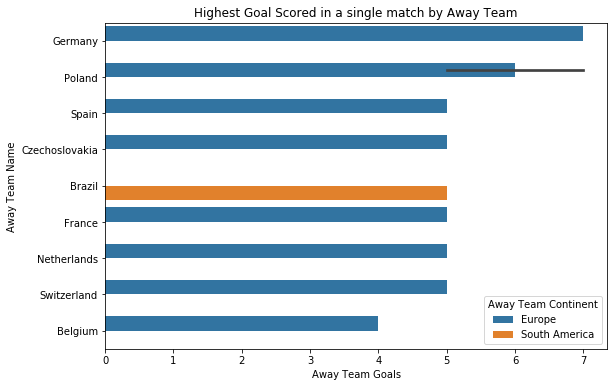

In [56]:
away_team_goals = (matches_clean_df
                   .sort_values(by='Away Team Goals', ascending=False)
                   [['Away Team Name', 'Away Team Goals', 'Away Team Continent']].head(10)
                  )
display(away_team_goals.head(3)) 
plt.figure(figsize=(9,6))
sns.barplot(data=away_team_goals, y='Away Team Name', x='Away Team Goals', hue='Away Team Continent')
plt.title('Highest Goal Scored in a single match by Away Team');

Germany has the highest number of away goals in a single match. Yet again, Europian countries dominated the top 10 list with only Brazil from South America being an exception.

### Q11: Which country has the highest number of World Cup trophy?

Brazil        5
Italy         4
Germany FR    3
Uruguay       2
Argentina     2
Name: Winner, dtype: int64

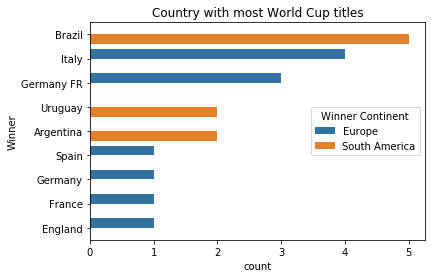

In [57]:
winners = world_clean_df.Winner.value_counts()
display(winners.head())
sns.countplot(data=world_clean_df, y='Winner', hue = 'Winner Continent', order=winners.index)
plt.title('Country with most World Cup titles');

South America country Brazil has the highest number of World Cup trophy; 5 in their cabinet!

### Q12: How does the attendance vary over the past finals? 

Year
1930     68346
1934     55000
1938     45000
1950    173850
1954     62500
Name: Attendance, dtype: int64

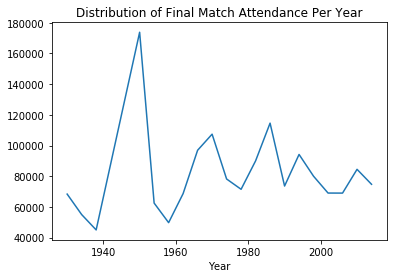

In [61]:
sum_attendance(world_clean_df, 'Final Match Attendance')

The 1950 final between Brazil and Uruguay remains the most attended match in World Cup history with 173850 spectators. Another observation is since the curios drop around 1954 to 1960, the number of spectators never reach 100,000. The most recent, 2014, being slightly over 74,000.

<a id='conclusion'></a>

## 8. Conclusion

### 8.1 About the Datasets

> In 'world_clean_df', some data entries are missing. For example, record for 1950 final is not in the dataset. This however is the one I could spot when performing exploratory data analysis. There is no guarantee that more data might not be missing. Furthermore, it is worth mentioning that generally, the three datasets are not 100% cleaned. 
>
> Since some of my analysis revolves round continent, new columns corresponding to continent are added for every country column

### 8.2 Summary of Findings

From the result of my analysis and visualizations, I was able to answer some questions about the datasets. Few of these include:  
>- About 83 countries have participated in the World Cup. Please note that this finding follows the dataset and does not count countries that have now merged as 'one' or split as 'two'. 
>- The 1950 World Cup hosted by Brazil has the highest total number of attendance; over a million!
>- RONALDO has the highest number of match played.
>- While most World Cup games are played in the month of June, majority of finals are played in the month of July and never beyond! This means the tournament does not take up to three months.
>- A higher percentage of participants are European Countries. 
>- Brazil has the highest number of World Cup titles.